# Prior functions illustration

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lightspot.priors import *

In [4]:
plt.rc('lines', linewidth=1.0, linestyle='-', color='black')
plt.rc('font', family='sans-serif', weight='normal', size=12.0)
plt.rc('text', color='black', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{cmbright}')
plt.rc('axes', edgecolor='black', facecolor='white', linewidth=1.0, grid=False,
       titlesize='x-large', labelsize='x-large', labelweight='normal', labelcolor='black')
plt.rc('axes.formatter', limits=(-4, 4))
plt.rc(('xtick', 'ytick'), labelsize='x-large', direction='in')
plt.rc('xtick', top=True)
plt.rc('ytick', right=True)
plt.rc(('xtick.major', 'ytick.major'), size=7, pad=6, width=1.0)
plt.rc(('xtick.minor', 'ytick.minor'), size=4, pad=6, width=1.0, visible=True)
plt.rc('legend', numpoints=1, fontsize='x-large', shadow=False, frameon=False)

## Univariate distributions

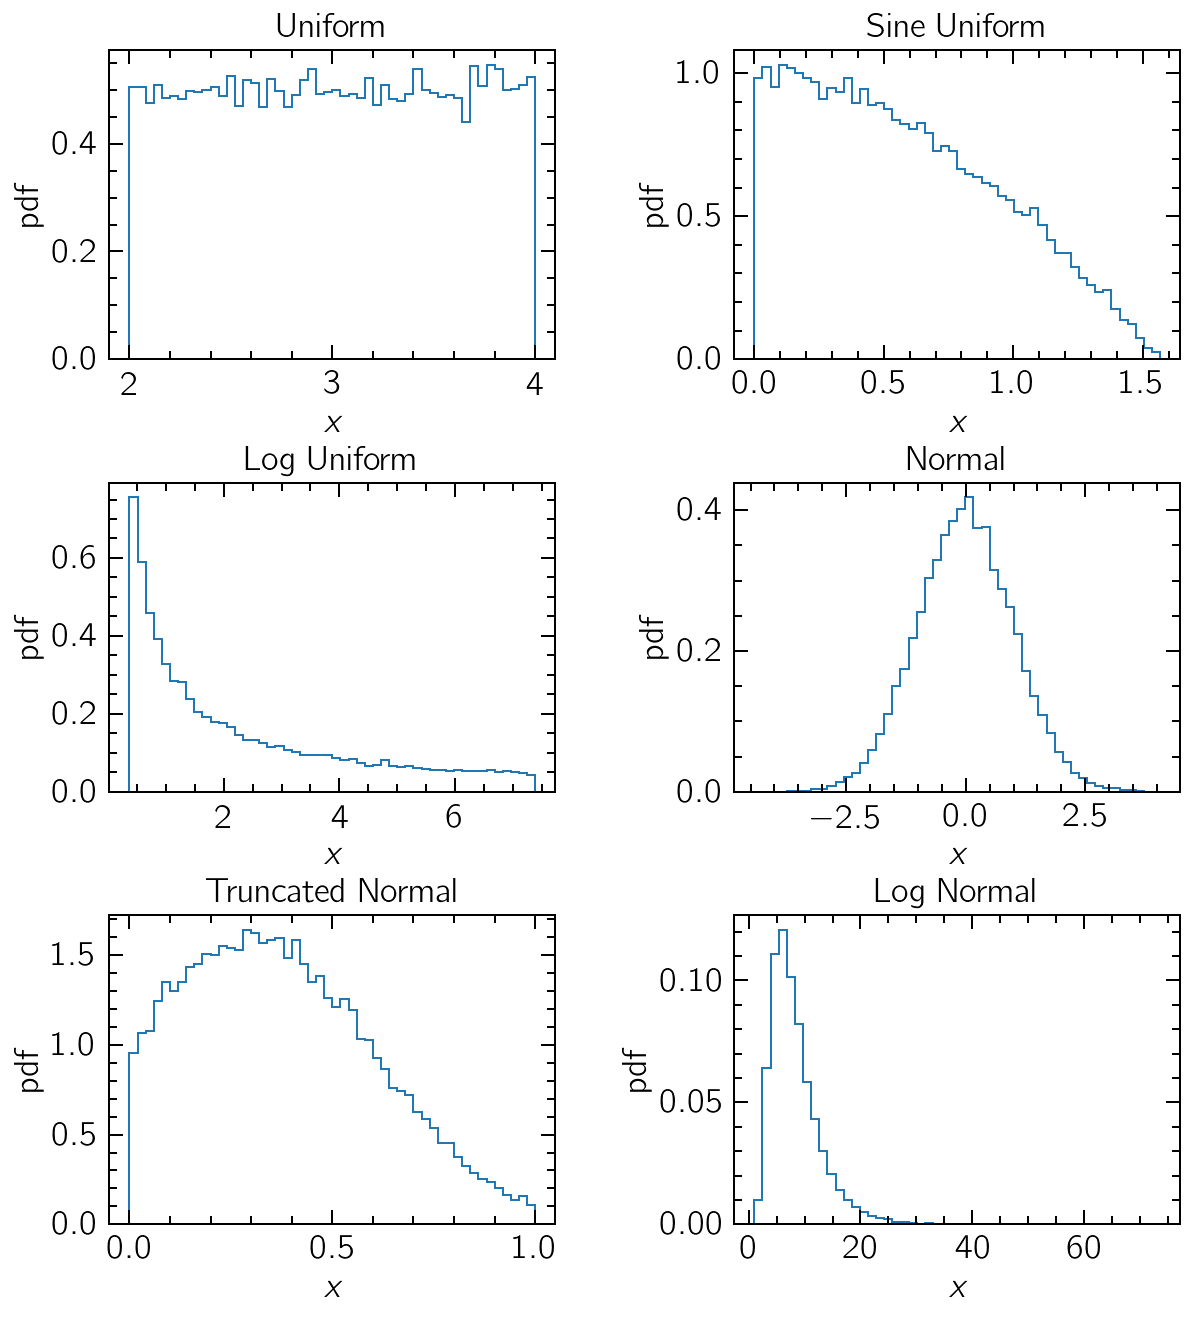

In [5]:
uni_priors = {
    "Uniform" : Uniform(xmin=2, xmax=4),
    "Sine Uniform" : SineUniform(sinxmin=0, sinxmax=1),
    "Log Uniform" : LogUniform(logxmin=-1, logxmax=2),
    "Normal" : Normal(mu=0, sd=1),
    "Truncated Normal" : TruncNormal(mu=0.3, sd=0.3, xmin=0, xmax=1),
    "Log Normal" : LogNormal(logmu=2, logsd=0.5)
}

fig, axs = plt.subplots(3, 2, figsize=(9.6, 10.8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, (prior_name, prior) in enumerate(uni_priors.items()):
    samples = prior.sample(*np.random.random(30_000))
    ax = axs[i // 2][i % 2]
    _ = ax.hist(samples, density=True, histtype='step', bins=50)
    ax.set(title=prior_name, xlabel='$x$', ylabel='pdf')

## Bivariate distributions

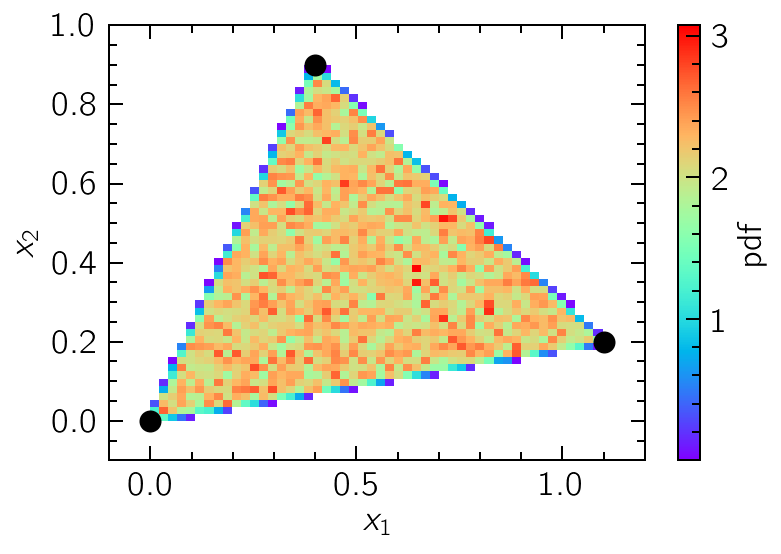

In [6]:
tri = np.array([[0, 0], [0.4, 0.9], [1.1, 0.2]])
prior = Triangular(tri)
samples = np.array([prior.sample(*val) for val in np.random.random([100_000, 2])])

cmap = plt.cm.get_cmap('rainbow')
cmap.set_under('w')
_ = plt.plot(tri[:, 0], tri[:, 1], 'o', ms=10, color='k')
_ = plt.hist2d(x=samples[:,0], y=samples[:,1], bins=50, density=True, cmap=cmap, vmin=1e-3)
_ = plt.colorbar(label="pdf")
_ = plt.gca().set(xlim=(-0.1, 1.2), ylim=(-0.1, 1.0), xlabel="$x_1$", ylabel="$x_2$")

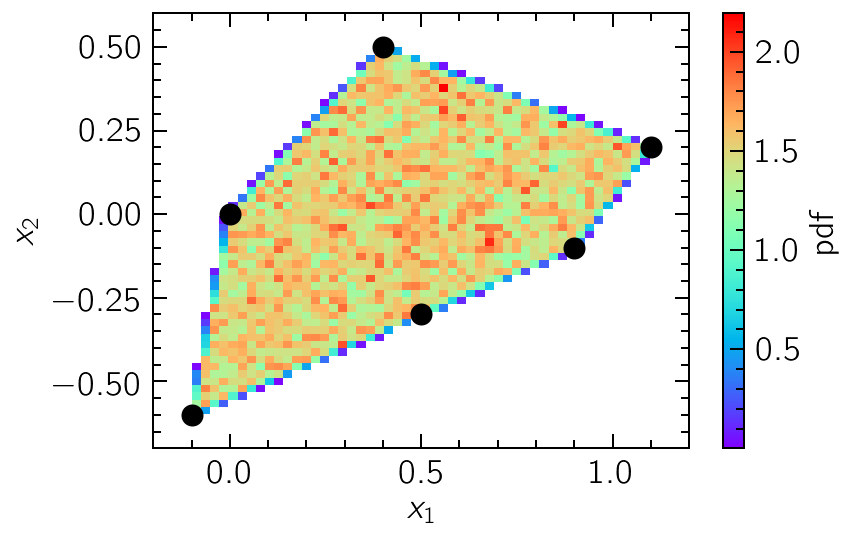

In [7]:
poly = np.array([[0, 0], [0.4, 0.5], [1.1, 0.2], [0.9, -0.1], [0.5, -0.3], [-0.1, -0.6]])
prior = Polygon(poly)
samples = np.array([prior.sample(*val) for val in np.random.random([100_000, 2])])

cmap = plt.cm.get_cmap('rainbow')
cmap.set_under('w')
_ = plt.plot(poly[:, 0], poly[:, 1], 'o', ms=10, color='k')
_ = plt.hist2d(x=samples[:,0], y=samples[:,1], bins=50, density=True, cmap=cmap, vmin=1e-3)
_ = plt.colorbar(label="pdf")
_ = plt.gca().set(xlim=(-0.2, 1.2), ylim=(-0.7, 0.6), xlabel="$x_1$", ylabel="$x_2$")